# Assignments

In [13]:
# Essential imports for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

## Creating Sample Datasets


In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Sales Data - E-commerce sales with categories and dates
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
categories = ['Electronics', 'Clothing', 'Books', 'Home & Garden', 'Sports']
sales_data = []

for date in dates:
    for category in categories:
        # Simulate seasonal patterns
        base_sales = np.random.normal(1000, 200)
        if date.month in [11, 12]:  # Holiday season
            base_sales *= 1.5
        elif date.month in [6, 7, 8]:  # Summer
            base_sales *= 1.2
        
        sales_data.append({
            'date': date,
            'category': category,
            'sales': max(0, base_sales + np.random.normal(0, 100)),
            'region': np.random.choice(['North', 'South', 'East', 'West'])
        })
sales_df = pd.DataFrame(sales_data)

# 2. Iris-like Dataset - Customer demographics
n_customers = 1000
customer_data = {
    'age': np.random.normal(35, 12, n_customers),
    'income': np.random.lognormal(10, 0.5, n_customers),
    'satisfaction': np.random.beta(2, 2, n_customers) * 10,
    'loyalty_score': np.random.exponential(2, n_customers),
    'segment': np.random.choice(['Premium', 'Standard', 'Basic'], n_customers, p=[0.2, 0.5, 0.3])
}
customer_df = pd.DataFrame(customer_data)

# 3. Stock Price Data - Simulated financial time series
stock_dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
stock_prices = []
price = 100

for date in stock_dates:
    # Random walk with drift
    price += np.random.normal(0.1, 2)
    price = max(price, 10)  # Floor price
    stock_prices.append({
        'date': date,
        'price': price,
        'volume': np.random.lognormal(8, 1)
    })

stock_df = pd.DataFrame(stock_prices)

# 4. Survey Data - Customer satisfaction survey
survey_data = {
    'product_quality': np.random.normal(7.5, 1.5, 500),
    'customer_service': np.random.normal(6.8, 1.8, 500),
    'price_satisfaction': np.random.normal(6.2, 2.0, 500),
    'delivery_speed': np.random.normal(7.0, 1.6, 500),
    'overall_satisfaction': np.random.normal(7.1, 1.4, 500),
    'recommendation_likelihood': np.random.normal(7.3, 1.7, 500)
}
survey_df = pd.DataFrame(survey_data)


In [15]:
sales_df.head(10)

,date,category,sales,region
0,2023-01-01,Electronics,1085.516400,East
1,2023-01-01,Clothing,1231.617179,South
2,2023-01-01,Books,1156.859787,West
3,2023-01-01,Home & Garden,919.892723,West
4,2023-01-01,Sports,960.361127,West
5,2023-01-02,Electronics,961.665074,East
6,2023-01-02,Clothing,840.150103,West
7,2023-01-02,Books,933.404495,South
8,2023-01-02,Home & Garden,871.030822,West
9,2023-01-02,Sports,1216.393298,East


In [16]:
customer_df.head()

,age,income,satisfaction,loyalty_score,segment
0,70.557301,12921.639277,5.068781,2.640431,Basic
1,47.907890,22583.910742,2.465860,0.230169,Premium
2,45.025094,18654.128414,8.084518,2.789132,Basic
3,25.834536,37120.438408,4.832619,0.093564,Standard
4,41.297670,27767.360394,2.657332,0.451338,Standard


In [17]:
stock_df.head()

,date,price,volume
0,2023-01-01,98.063325,3925.325257
1,2023-01-02,95.693441,485.012663
2,2023-01-03,98.142733,11486.164759
3,2023-01-04,95.882693,711.953955
4,2023-01-05,94.676314,10433.826469


In [18]:
survey_df.head()

,product_quality,customer_service,price_satisfaction,delivery_speed,overall_satisfaction,recommendation_likelihood
0,7.741591,6.812408,8.269497,6.748587,5.936986,7.849201
1,5.646543,8.411788,6.009505,6.867336,8.148917,6.698353
2,10.363440,9.525001,7.402884,9.099679,7.096986,10.054312
3,6.920233,4.532561,5.673566,3.802367,6.740735,8.772403
4,6.438082,7.329289,7.183255,6.672579,5.530683,8.046430


## Assignment 1: Create a Multi-Panel Dashboard
**Objective**: Create a comprehensive dashboard showing sales analytics.

**Requirements**:
- 4 subplots in a 2x2 grid
- Include: sales over time, category distribution, regional comparison, and top performing products
- Use both Matplotlib and Seaborn
- Add proper titles, labels, and formatting

In [19]:
category_totals = sales_df.groupby('category')['sales'].sum().sort_values(ascending=False)
category_totals

category
Electronics      419007.592552
Sports           418154.467640
Home & Garden    415645.050605
Clothing         415619.601758
Books            414567.420177
Name: sales, dtype: float64

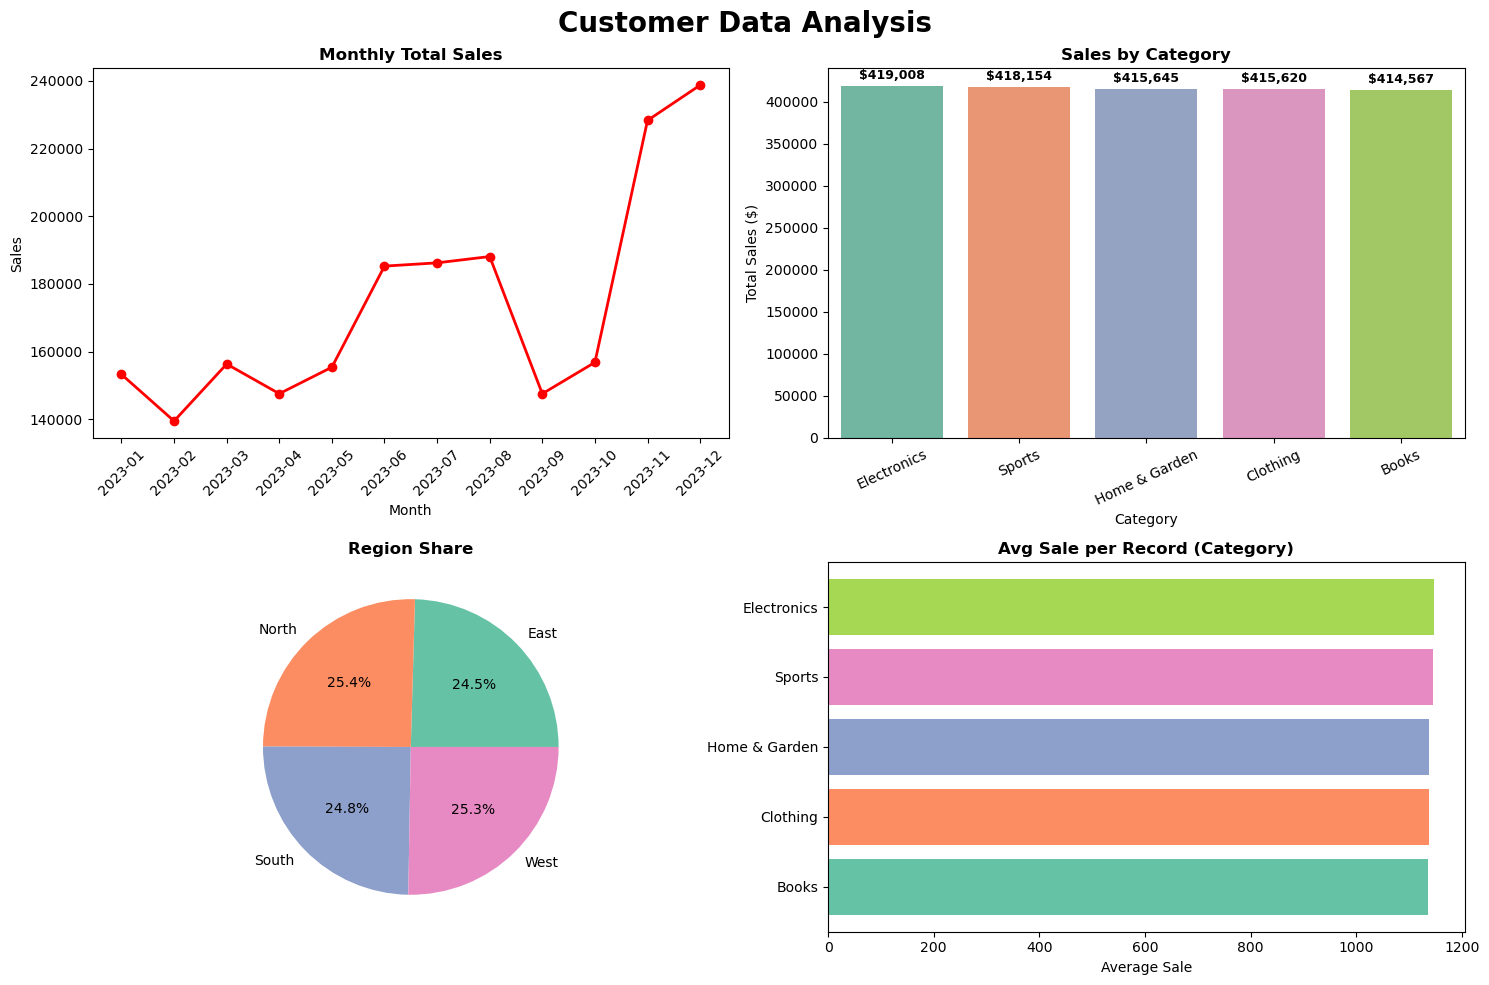

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Customer Data Analysis', fontsize=20, fontweight='bold')
cat_colors = sns.color_palette("Set2", len(category_totals))

# 1. Sales over time (total monthly)
monthly_totals = sales_df.groupby(sales_df['date'].dt.to_period('M'))['sales'].sum()
axes[0, 0].plot(monthly_totals.index.astype(str), monthly_totals.values, marker='o', linewidth=2, c='red')
axes[0, 0].set_title('Monthly Total Sales', fontweight = 'bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Category distribution (total by category)
category_totals = sales_df.groupby('category')['sales'].sum().sort_values(ascending=False)
bars = sns.barplot(x=category_totals.index,
                      y=category_totals.values,
                      ax=axes[0, 1],
                      palette=cat_colors)

# Add value labels (iterate patches)
for patch in bars.patches:
    height = patch.get_height()
    x_center = patch.get_x() + patch.get_width() / 2
    axes[0, 1].text(x_center, height + (0.01 * category_totals.max()),
                    f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[0, 1].set_title('Sales by Category', fontweight='bold')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Total Sales ($)')
axes[0, 1].tick_params(axis='x', rotation=25)
# 3. Regional comparison (simple pie)
regional_totals = sales_df.groupby('region')['sales'].sum()
axes[1, 0].pie(regional_totals.values, labels=regional_totals.index, autopct='%1.1f%%', 
                colors=cat_colors)
axes[1, 0].set_title('Region Share', fontweight ='bold')

# 4. Top performing products (reuse categories: average sales per category)
category_avg = sales_df.groupby('category')['sales'].mean().sort_values()
axes[1, 1].barh(category_avg.index, category_avg.values, color=cat_colors)
axes[1, 1].set_title('Avg Sale per Record (Category)', fontweight = 'bold')
axes[1, 1].set_xlabel('Average Sale')

plt.tight_layout()
plt.show()
fig.savefig('Customer_Data_Analysis.pdf') #save in pdf

## Assignment 2: Statistical Analysis Visualization
**Objective**: Create a comprehensive statistical analysis of customer data.

**Requirements**:
- 9 subplots in a 3x3 grid
- Show distribution of key metrics
- Include correlation analysis
- Add statistical annotations (mean, median, etc.)
- Use appropriate color schemes


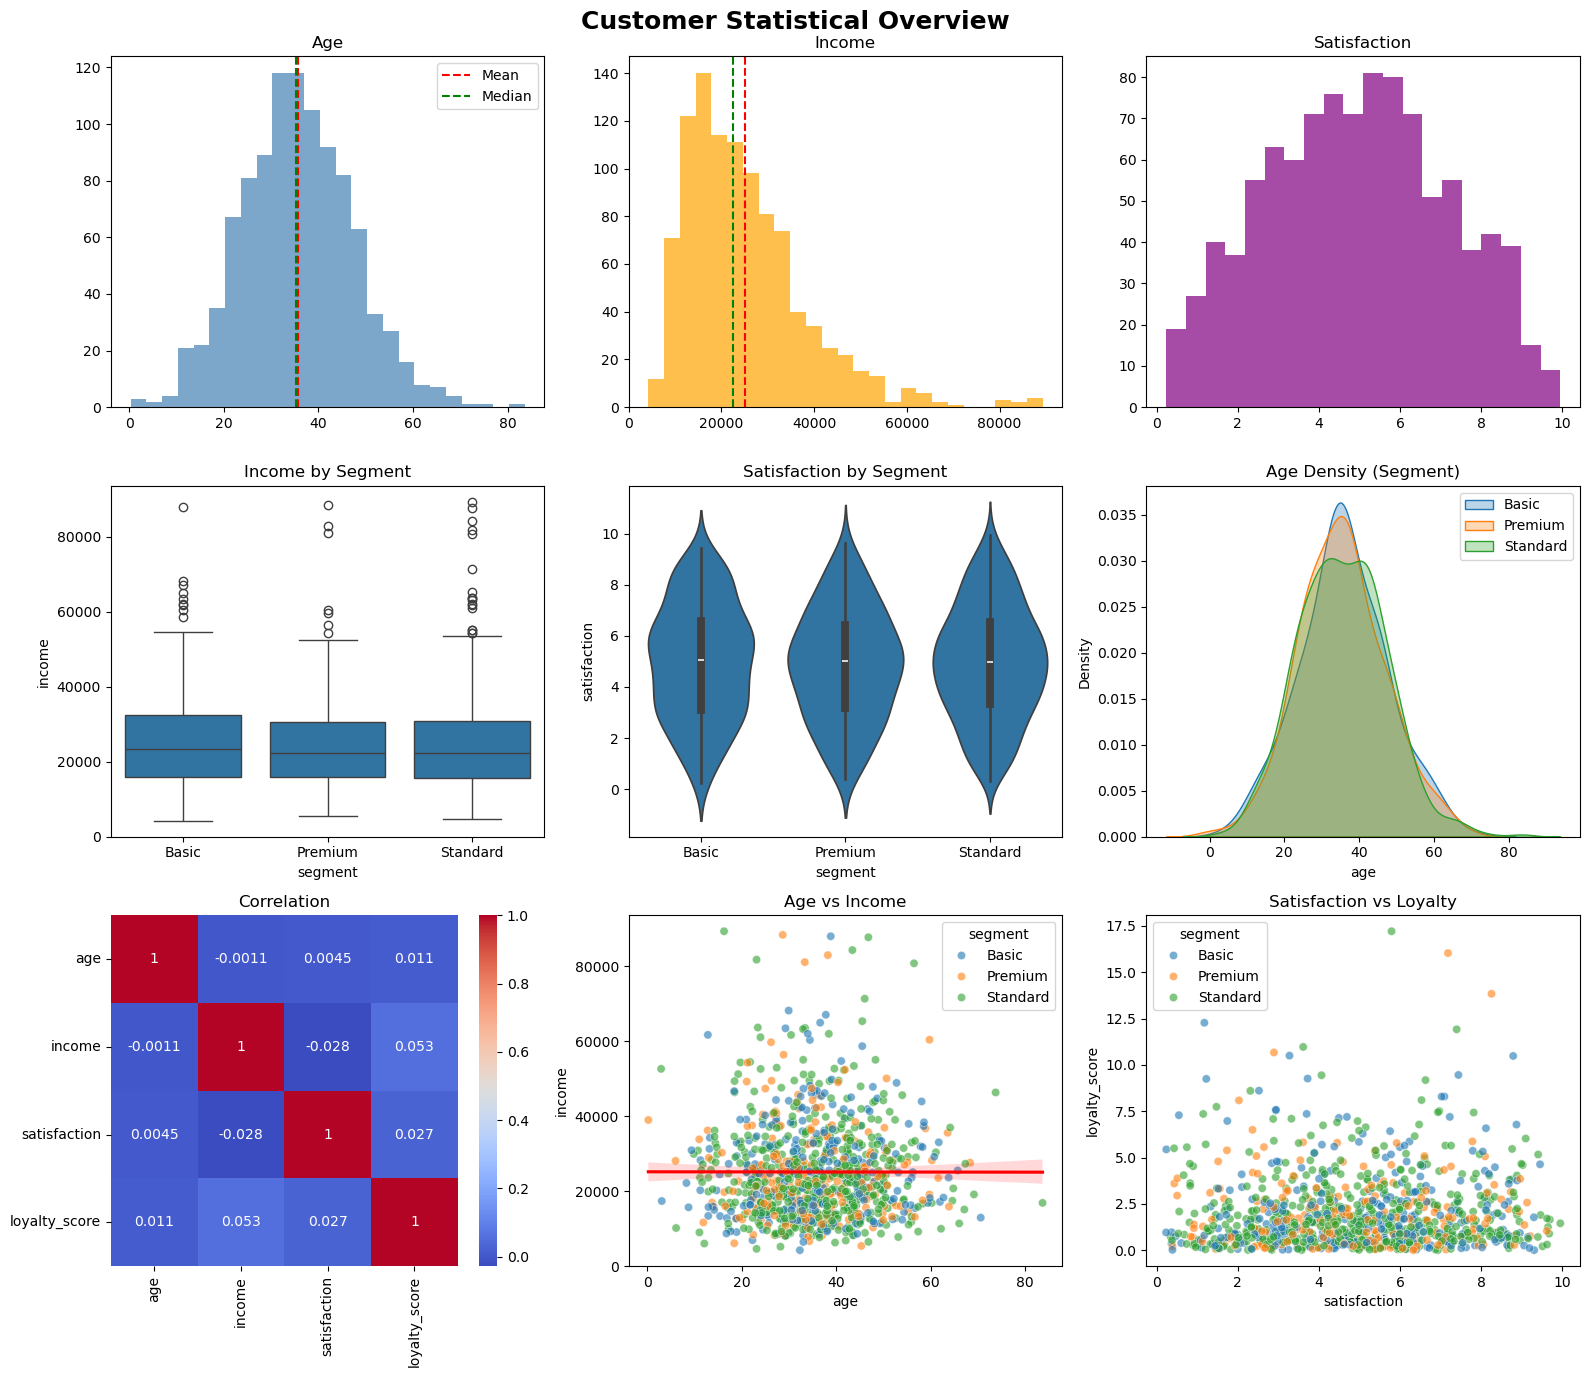

In [21]:
# Statistical Analysis (3x3)

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
fig.suptitle('Customer Statistical Overview', fontsize=18, fontweight='bold')

# 1 Age distribution
axes[0][0].hist(customer_df['age'], bins=25, color='steelblue', alpha=0.7)
axes[0][0].axvline(customer_df['age'].mean(), color='red', linestyle='--', label='Mean')
axes[0][0].axvline(customer_df['age'].median(), color='green', linestyle='--', label='Median')
axes[0][0].set_title('Age')
axes[0][0].legend()

# 2 Income distribution
axes[0][1].hist(customer_df['income'], bins=25, color='orange', alpha=0.7)
axes[0][1].set_title('Income')
axes[0][1].axvline(customer_df['income'].mean(), color='red', linestyle='--')
axes[0][1].axvline(customer_df['income'].median(), color='green', linestyle='--')

# 3 Satisfaction distribution
axes[0][2].hist(customer_df['satisfaction'], bins=20, color='purple', alpha=0.7)
axes[0][2].set_title('Satisfaction')

# 4 Income by segment (box)
sns.boxplot(data=customer_df, x='segment', y='income', ax=axes[1][0])
axes[1][0].set_title('Income by Segment')

# 5 Satisfaction by segment (violin)
sns.violinplot(data=customer_df, x='segment', y='satisfaction', ax=axes[1][1])
axes[1][1].set_title('Satisfaction by Segment')

# 6 Age KDE by segment
for seg in customer_df['segment'].unique():
    sns.kdeplot(customer_df[customer_df['segment']==seg]['age'], ax=axes[1][2], label=seg, fill=True, alpha=0.3)
axes[1][2].set_title('Age Density (Segment)')
axes[1][2].legend()

# 7 Correlation heatmap
corr = customer_df[['age','income','satisfaction','loyalty_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[2][0])
axes[2][0].set_title('Correlation')

# 8 Age vs Income with regression
sns.scatterplot(data=customer_df, x='age', y='income', hue='segment', ax=axes[2][1], alpha=0.6)
sns.regplot(data=customer_df, x='age', y='income', scatter=False, ax=axes[2][1], color='red')
axes[2][1].set_title('Age vs Income')

# 9 Satisfaction vs Loyalty
sns.scatterplot(data=customer_df, x='satisfaction', y='loyalty_score', hue='segment', ax=axes[2][2], alpha=0.6)
axes[2][2].set_title('Satisfaction vs Loyalty')

plt.tight_layout()
plt.show()
fig.savefig('Customer_Statistical_Overview.pdf') #save in pdf

## Assignment 3: Time Series Analysis
**Objective**: Create a comprehensive time series analysis of stock prices.

**Requirements**:
- 3 subplots in a 3x1 grid
- Show price trends over time
- Include volume analysis
- Add moving averages
- Highlight significant events


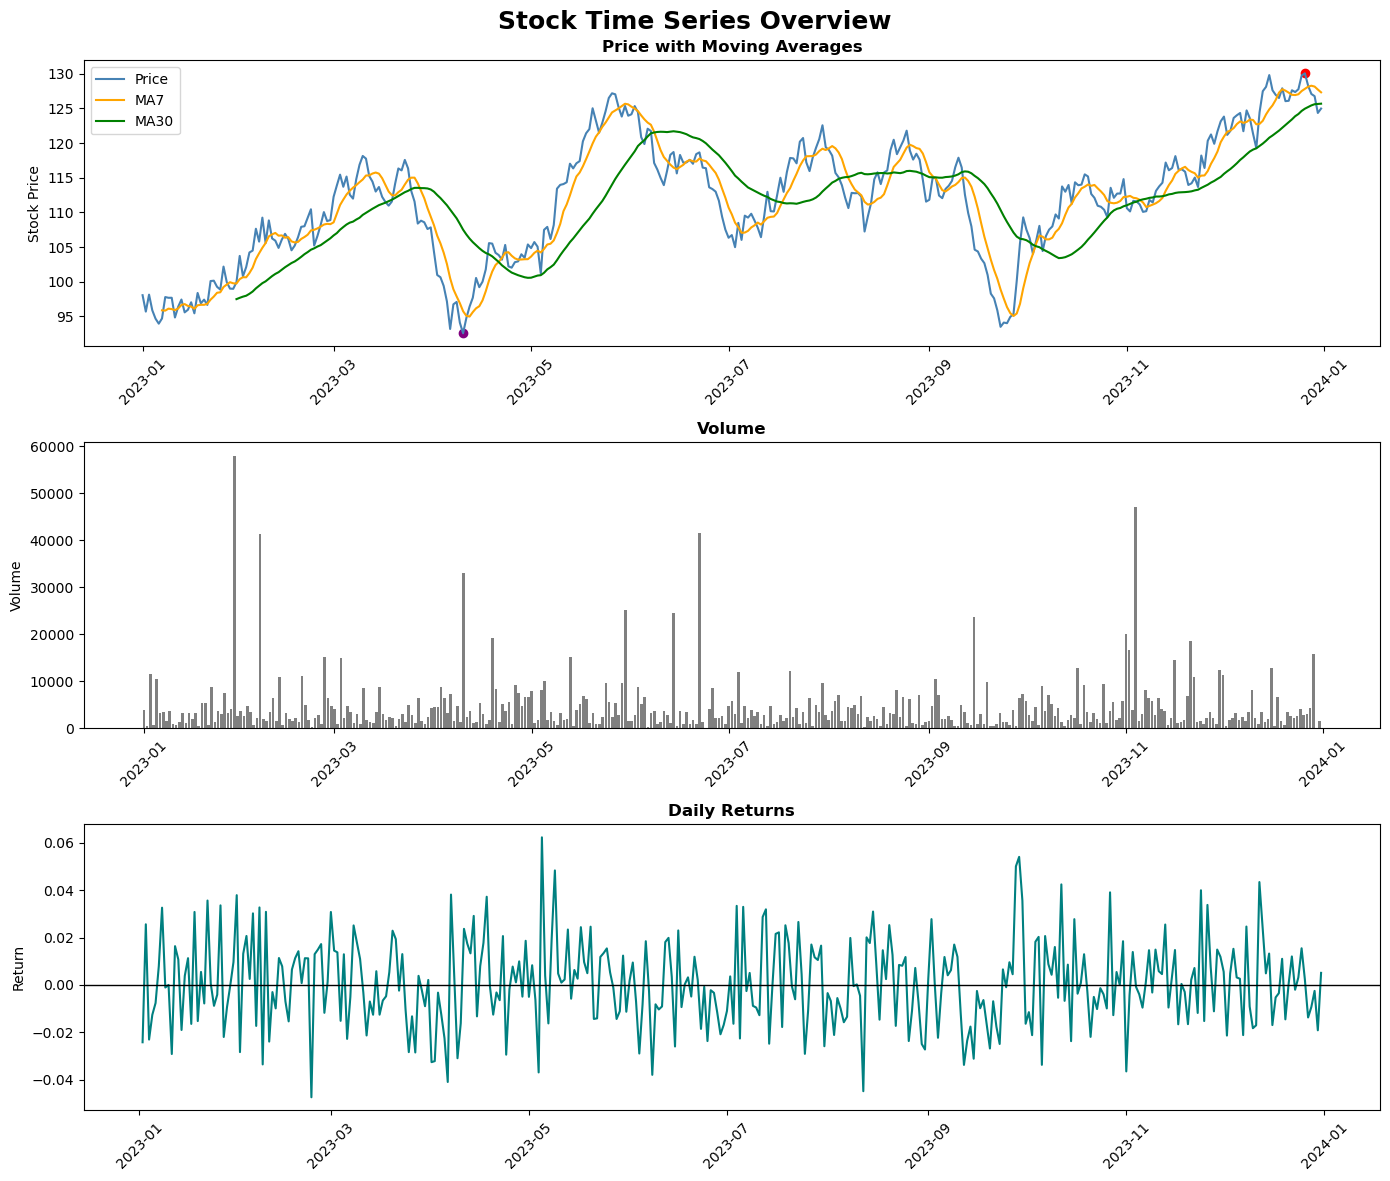

In [22]:
# Time Series (3x1)

# Prep moving averages
stock_df['MA7'] = stock_df['price'].rolling(7).mean()
stock_df['MA30'] = stock_df['price'].rolling(30).mean()
stock_df['returns'] = stock_df['price'].pct_change()

fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Stock Time Series Overview', fontsize=18, fontweight='bold')

# 1 Price + MAs
axes[0].plot(stock_df['date'], stock_df['price'], label='Price', color='steelblue')
axes[0].plot(stock_df['date'], stock_df['MA7'], label='MA7', color='orange')
axes[0].plot(stock_df['date'], stock_df['MA30'], label='MA30', color='green')
axes[0].set_title('Price with Moving Averages', fontweight = 'bold')
axes[0].set_ylabel('Stock Price')
axes[0].legend()
# Highlight max/min
max_row = stock_df.loc[stock_df['price'].idxmax()]
min_row = stock_df.loc[stock_df['price'].idxmin()]
axes[0].scatter(max_row['date'], max_row['price'], color='red')
axes[0].scatter(min_row['date'], min_row['price'], color='purple')

# 2 Volume
axes[1].bar(stock_df['date'], stock_df['volume'], color='gray')
axes[1].set_title('Volume', fontweight = 'bold')
axes[1].set_ylabel('Volume')

# 3 Daily returns
axes[2].plot(stock_df['date'], stock_df['returns'], color='teal')
axes[2].axhline(0, color='black', linewidth=1)
axes[2].set_title('Daily Returns', fontweight = 'bold')
axes[2].set_ylabel('Return')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
fig.savefig('Stock_Time_Series_Overview.pdf') #save in pdf